In [ ]:
import numpy as np

def lda_2d_to_1d(X, y):

    # Step 1: Compute the mean vectors for each class
    class_labels = np.unique(y)
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y == cl], axis=0))

    # Step 2: Compute the within-class scatter matrix SW
    SW = np.zeros((X.shape[1], X.shape[1])) # Initialize the within-class scatter matrix SW as a zero matrix of size (number of features) x (number of features)
    for cl, mean_vec in zip(class_labels, mean_vectors):
        class_scatter = np.zeros((X.shape[1], X.shape[1]))  # scatter matrix for every class
        for row in X[y == cl]:
            row, mean_vec = row.reshape(2, 1), mean_vec.reshape(2, 1)
            class_scatter += (row - mean_vec).dot((row - mean_vec).T)
        SW += class_scatter

    # Step 3: Compute the between-class scatter matrix SB
    overall_mean = np.mean(X, axis=0).reshape(2, 1)
    SB = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == class_labels[i]].shape[0]
        mean_vec = mean_vec.reshape(2, 1)  # make it a column vector
        SB += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

    # Step 4: Solve the generalized eigenvalue problem for the matrix inv(SW) * SB
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

    # Step 5: Sort eigenvectors by eigenvalues in descending order
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    # Step 6: Select the top eigenvector (since we want to reduce to 1D)
    W = eig_pairs[0][1].reshape(2, 1)

    # Step 7: Transform the data to 1D
    X_lda = X.dot(W)

    return X_lda

# Example usage
# Assume we have a 2D dataset with two classes (y=0, y=1)
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6], [5, 8], [6, 7], [7, 8], [8, 9]])  # 2D data
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Class labels

# Perform LDA
X_lda = lda_2d_to_1d(X, y)
print("Transformed 1D data:\n", X_lda)

Transformed 1D data:
 [[-2.42535625]
 [-3.15296313]
 [-3.88057   ]
 [-4.60817688]
 [-6.54846188]
 [-5.33578375]
 [-6.06339063]
 [-6.7909975 ]]


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Example 2D dataset
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6], [5, 8], [6, 7], [7, 8], [8, 9]])  # 2D data
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Class labels

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the model and transform the data to 1D
X_lda = lda.fit(X, y).transform(X)

print("Transformed 1D data:\n", X_lda)

Transformed 1D data:
 [[-3.01511345]
 [-2.11057941]
 [-1.20604538]
 [-0.30151134]
 [ 2.11057941]
 [ 0.60302269]
 [ 1.50755672]
 [ 2.41209076]]


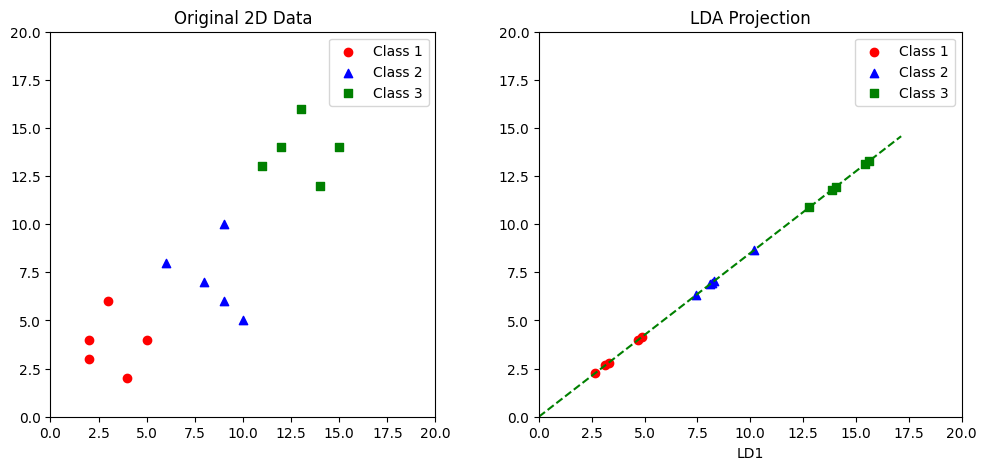

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for three classes
x1 = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [5, 4]])
x2 = np.array([[9, 10], [6, 8], [9, 6], [8, 7], [10, 5]])
x3 = np.array([[14, 12], [12, 14], [11, 13], [13, 16], [15, 14]])

# Scatter plot of the three classes (Original Data)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1[:, 0], x1[:, 1], color='red', marker='o', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color='blue', marker='^', label='Class 2')
plt.scatter(x3[:, 0], x3[:, 1], color ='green', marker='s', label='Class 3')
plt.title('Original 2D Data')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# Class means
mu1 = np.mean(x1, axis=0)
mu2 = np.mean(x2, axis=0)
mu3 = np.mean(x3, axis=0)

# Covariance matrices
s1 = np.cov(x1, rowvar=False)
s2 = np.cov(x2, rowvar=False)
s3 = np.cov(x3, rowvar=False)

# Within-class scatter matrix
sw = s1 + s2 + s3

# Between-class scatter matrix
sb = np.outer((mu1 - mu2), (mu1 - mu2)) + np.outer((mu1 - mu3), (mu1 - mu3)) + np.outer((mu2 - mu3), (mu2 - mu3))

# Compute LDA projection
invsw_by_sb = np.dot(np.linalg.inv(sw), sb)

# Get projection vectors
eigenvalues, eigenvectors = np.linalg.eig(invsw_by_sb)

# First projection vector
w = eigenvectors[:, 0]

# Project data to 1D
y1 = np.dot(x1, w)
y2 = np.dot(x2, w)
y3 = np.dot(x3, w)

# Plot the projected data in the original 2D space showing projection direction
theta = np.arctan2(w[1], w[0])
z1x, z1y = np.multiply(np.cos(theta), y1), np.multiply(np.sin(theta), y1)
z2x, z2y = np.multiply(np.cos(theta), y2), np.multiply(np.sin(theta), y2)
z3x, z3y = np.multiply(np.cos(theta), y3), np.multiply(np.sin(theta), y3)
z4x, z4y = np.multiply(np.cos(theta), max([max(y1), max(y2), max(y3)]) + 2), np.multiply(np.sin(theta), max([max(y1), max(y2), max(y3)]) + 2)

plt.subplot(1, 2, 2)
plt.plot([0, z4x], [0, z4y], 'g--')
plt.scatter(z1x, z1y, color='red', marker='o', label='Class 1')
plt.scatter(z2x, z2y, color='blue', marker='^', label='Class 2')
plt.scatter(z3x, z3y, color='green', marker='s', label='Class 3')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend()
plt.show()

